In [3]:
library(ggplot2)
library(dplyr)
options(repr.plot.width=10, repr.plot.height=20)
celltypes <- celltypes <- c('B cell','CD14+ monocyte','CD16+ monocyte','CD4+ T cell','Cytotoxic T cell','Dendritic cell',
               'Megakaryocyte', 'Natural killer cell','Plasmacytoid dendritic cell')

Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [58]:
files <- list.files("../Data/results/SCN/", pattern = "136",full.names = T)
sets <- lapply(files, function(file) read.csv(file, sep="\t"))
sets <- lapply(sets, function(set) reshape2::melt(set, id=c("id", "predicted", "class_", "prediction.match")))
scn <- do.call(rbind, sets)

               
scn$variable <- stringr::str_replace_all(scn$variable,pattern = "\\.\\.", replacement = "+ ")
scn$variable <-  stringr::str_replace_all(scn$variable,pattern = "\\.", replacement = " ")
scn <- scn[scn$class_ %in% celltypes & scn$variable %in% celltypes,]
scn <- scn %>% group_by(id, variable, class_) %>% summarise(mean = mean(value))
scn$method = "SCN"
#ggplot(scn, aes(variable, mean, color=variable))+geom_boxplot(width=0.1)+ facet_grid(rows = vars(class_))+theme_bw()+
#theme(legend.position = "none", axis.text.x=element_text(size=6, angle=20, hjust = 1))

`summarise()` has grouped output by 'id', 'variable'. You can override using the `.groups` argument.


In [59]:
files <- list.files("../Data/results/ItClust/", pattern = "136",full.names = T)
files <- lapply(files, function(file) list.files(paste(sep="/",file, "results"), pattern="clustering_prob.csv", full.names = T))
sets <- lapply(files, function(file) read.csv(file, sep=","))
set <- do.call(rbind, sets)
colnames(set) <- c("id", celltypes)
set$id  <- stringr::str_replace_all(set$id, pattern = "-target", "")
meta <- read.csv("../Data/processed/PBMC_mono/meta_test.txt")
set <- merge(set,  meta, by=c("id"))
itClust <- reshape2::melt(set, id=c("id", "class_"))
itClust <- itClust %>% group_by(id, variable, class_) %>% summarise(mean = mean(value))
itClust$method ="ItClust"               
#ggplot(itClust, aes(variable, mean, color=variable))+geom_boxplot(width=0.1)+ facet_grid(rows = vars(class_))+theme_bw()+
#theme(legend.position = "none", axis.text.x=element_text(size=6, angle=20, hjust = 1))

`summarise()` has grouped output by 'id', 'variable'. You can override using the `.groups` argument.


,B cell,CD14+ monocyte,CD16+ monocyte,CD4+ T cell,Cytotoxic T cell,Dendritic cell,Megakaryocyte,Natural killer cell,Plasmacytoid dendritic cell,id,class_
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,28.22256,0.7709993,-18.48922,-9.404045,2.285481,4.7405291,5.380753,-14.76262,0.3661565,pbmc1_Drop_AAAAGATGTGGT,CD4+ T cell
2,24.84074,-6.6651793,-13.45754,-7.686820,-1.485284,8.3871584,5.099043,-17.55754,7.7666554,pbmc1_Drop_AAAAGGATTTCC,Cytotoxic T cell
3,47.54683,-5.6742153,-22.22146,-7.475629,-6.195920,13.3390884,2.362652,-29.40466,6.5403333,pbmc1_Drop_AAAAGTGTTTAA,Cytotoxic T cell
4,27.90801,-9.6368999,-15.16593,-3.802164,5.497740,0.2411044,10.997973,-18.70575,2.7023828,pbmc1_Drop_AAAATGATGTAT,Cytotoxic T cell
5,43.23960,-16.4359035,-19.69815,3.547086,0.671783,-0.5867233,6.758180,-28.67197,11.8880434,pbmc1_Drop_AAACAAACCGAC,Natural killer cell
6,49.51338,-15.7961273,-19.29432,6.251859,-4.512482,3.3065114,4.577395,-34.02663,13.0272703,pbmc1_Drop_AAACACACTCTA,Cytotoxic T cell


`summarise()` has grouped output by 'id', 'variable'. You can override using the `.groups` argument.


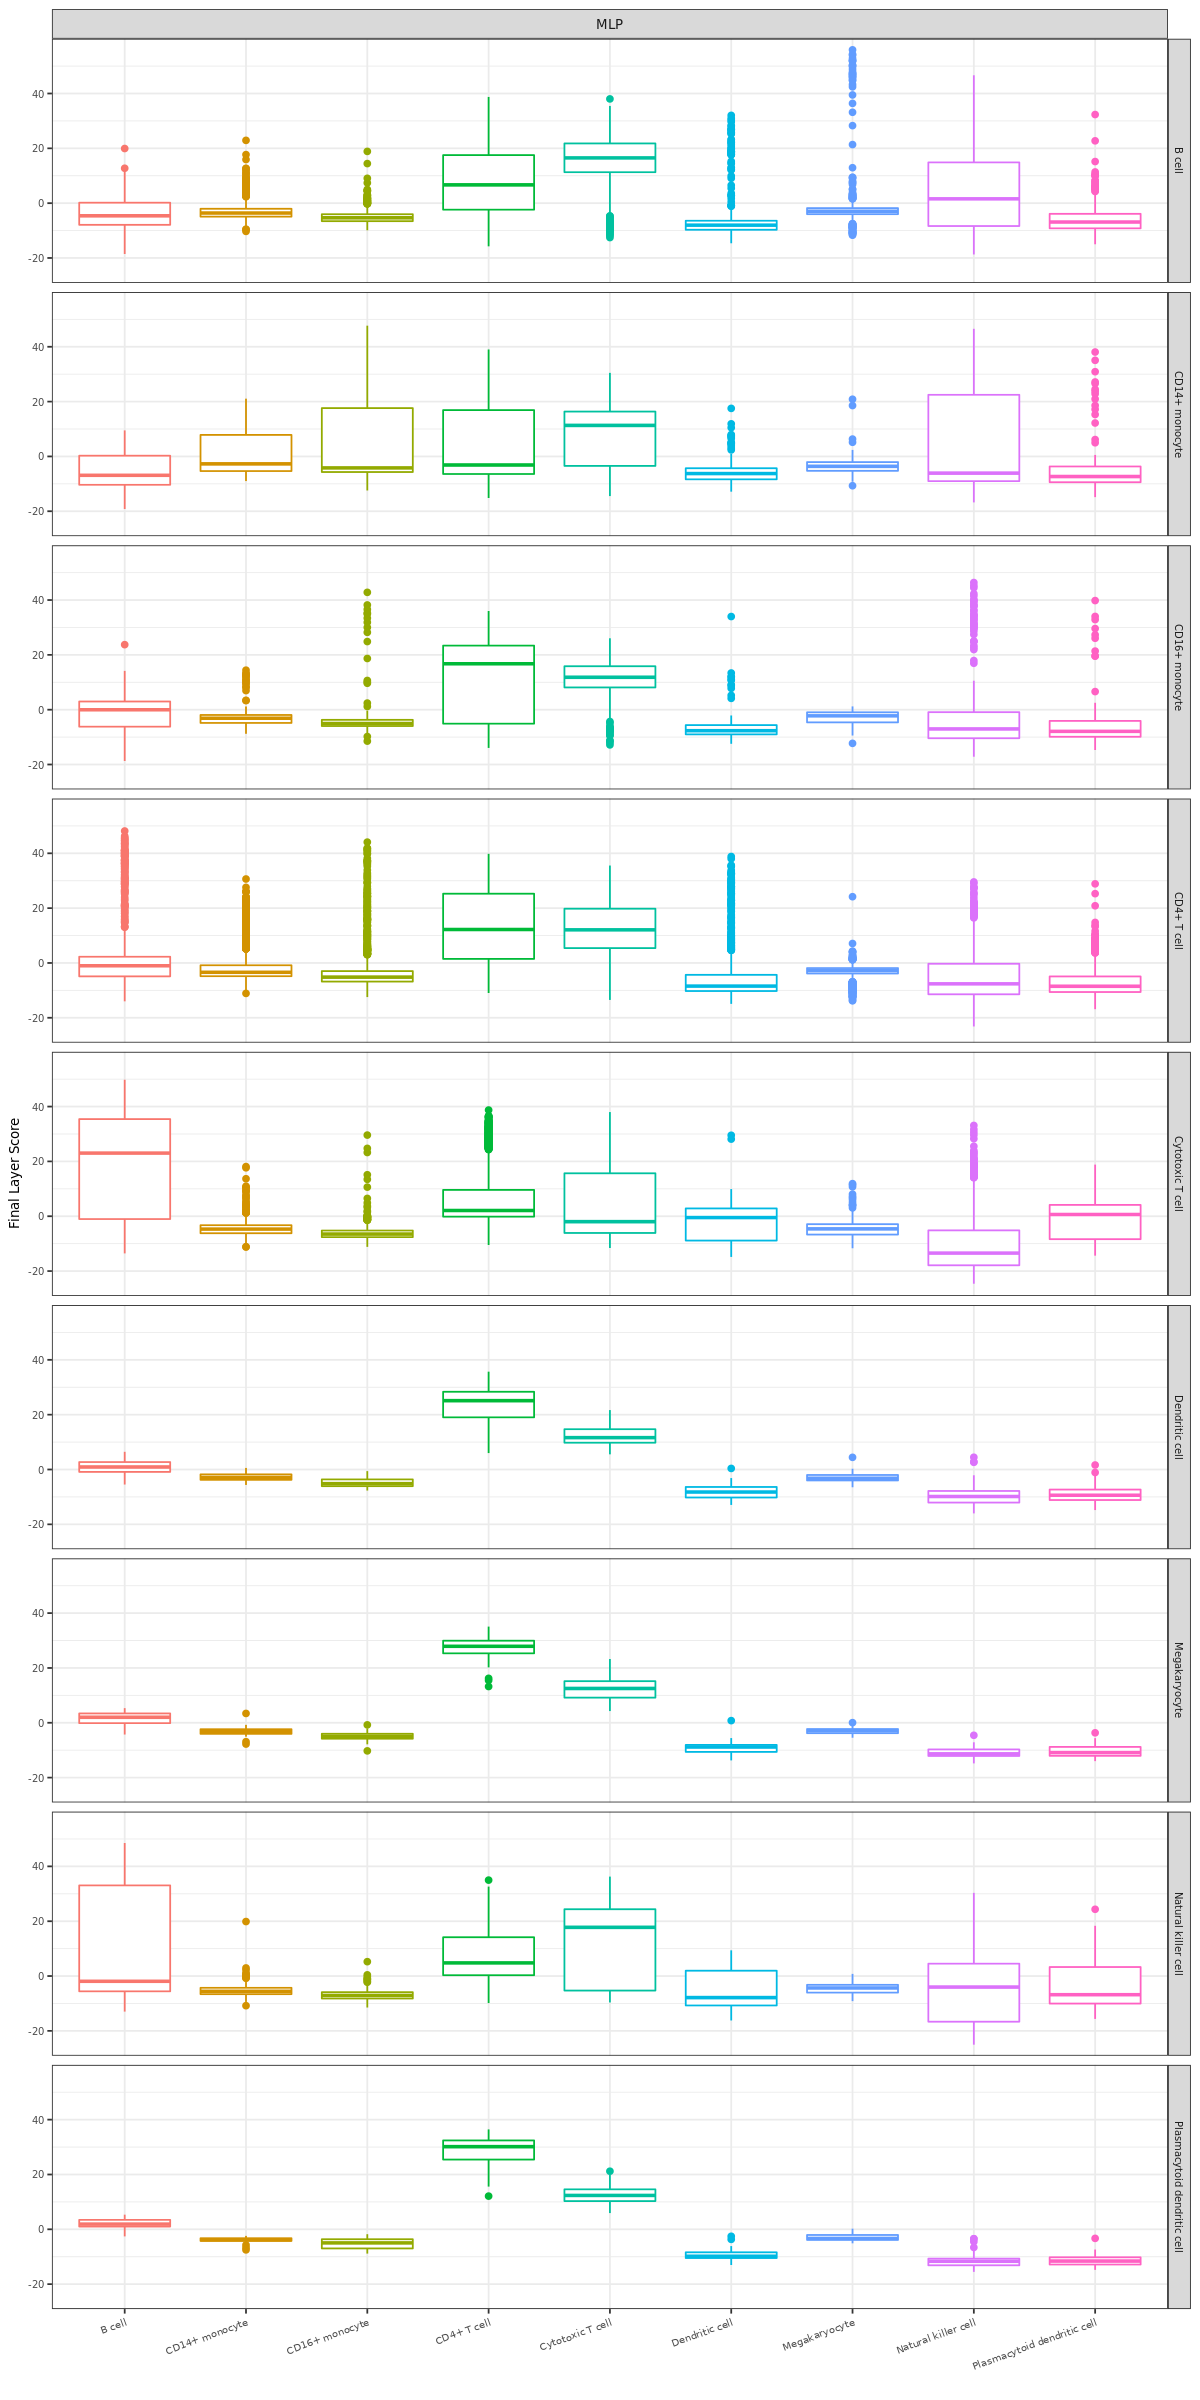

In [94]:
files <- list.files("../Data/results/MLP/", pattern = "136",full.names = T)
sets <- lapply(files, function(file) read.csv(paste(file, "final_layer.csv", sep="/"), sep=",", header=F))
set <- do.call(rbind, sets)
colnames(set) <- c(celltypes)
meta <- read.csv("../Data/processed/PBMC_mono/meta_test.txt")
set <- cbind(set,  meta)
head(set)               
mlp <- reshape2::melt(set, id=c("id", "class_"))
mlp <- mlp %>% group_by(id, variable, class_) %>% summarise(mean = mean(value))
mlp$method ="MLP"               
plot_mlp <- ggplot(mlp, aes(variable, mean, color=variable))+geom_boxplot()+ facet_grid(rows = vars(class_), cols = vars(method))+theme_bw()+
theme( axis.text.x=element_text(size=6,  angle=20, hjust = 1), axis.text.y=element_text(size=6), axis.title=element_text(size=8), plot.title=element_text(size=8),
              legend.position = "none", legend.key.size = unit(0.5,"line"),
              strip.text.x = element_text(size = 8), strip.text.y = element_text(size = 6))+xlab("")+ylab("Final Layer Score")
               
plot_mlp

In [68]:
files <- list.files("../Data/results/Seurat/", pattern = "136",full.names = T)
files <- files[stringr::str_detect(files, pattern = "pred")]
sets <- lapply(files, function(file) read.csv(file, sep="\t", header=T))
               
set <- do.call(rbind, sets)
set$id <- rownames(set)  
colnames(set)[1] <- "predicted"
meta <- read.csv("../Data/processed/PBMC_mono/meta_test.txt", header=T)

set <- merge(set, meta, by=c("id"))
              
colnames(set) <- stringr::str_replace_all(colnames(set), "prediction.score.","") 
               
colnames(set) <- stringr::str_replace_all(colnames(set),pattern = "\\.\\.", replacement = "+ ")
colnames(set) <-  stringr::str_replace_all(colnames(set),pattern = "\\.", replacement = " ")              
              
seurat <- reshape2::melt(set, id=c("id", "class_", "predicted", "max"))

seurat <- seurat %>% group_by(id, variable, class_) %>% summarise(mean = mean(as.numeric(value)))
seurat$method = "Seurat"
#ggplot(mlp, aes(variable, mean, color=variable))+geom_boxplot(width=0.1)+ facet_grid(rows = vars(class_))+theme_bw()+
#theme(legend.position = "none", axis.text.x=element_text(size=6, angle=20, hjust = 1))

`summarise()` has grouped output by 'id', 'variable'. You can override using the `.groups` argument.


In [69]:
data <- rbind(scn, mlp, itClust,seurat)
head(data)

id,variable,class_,mean,method
<chr>,<chr>,<chr>,<dbl>,<chr>
pbmc1_Drop_AAAAACTGGGAT,B cell,Cytotoxic T cell,0.01135,SCN
pbmc1_Drop_AAAAACTGGGAT,CD14+ monocyte,Cytotoxic T cell,0.00260,SCN
pbmc1_Drop_AAAAACTGGGAT,CD16+ monocyte,Cytotoxic T cell,0.00540,SCN
pbmc1_Drop_AAAAACTGGGAT,CD4+ T cell,Cytotoxic T cell,0.36215,SCN
pbmc1_Drop_AAAAACTGGGAT,Cytotoxic T cell,Cytotoxic T cell,0.55780,SCN
pbmc1_Drop_AAAAACTGGGAT,Dendritic cell,Cytotoxic T cell,0.00655,SCN


In [95]:
x <- ggplot(data[data$method != "MLP",], aes(variable, mean, color=variable))+geom_boxplot()+ facet_grid(rows = vars(class_), cols=vars(method))+theme_bw()+
theme( axis.text.x=element_text(size=6,  angle=20, hjust = 1), axis.text.y=element_text(size=6), plot.title=element_text(size=8),
              legend.position = "none", legend.key.size = unit(0.5,"line"),
              strip.text.x = element_text(size = 8), strip.text.y = element_text(size = 6))+
        xlab("")+ylab("Confidence Score")

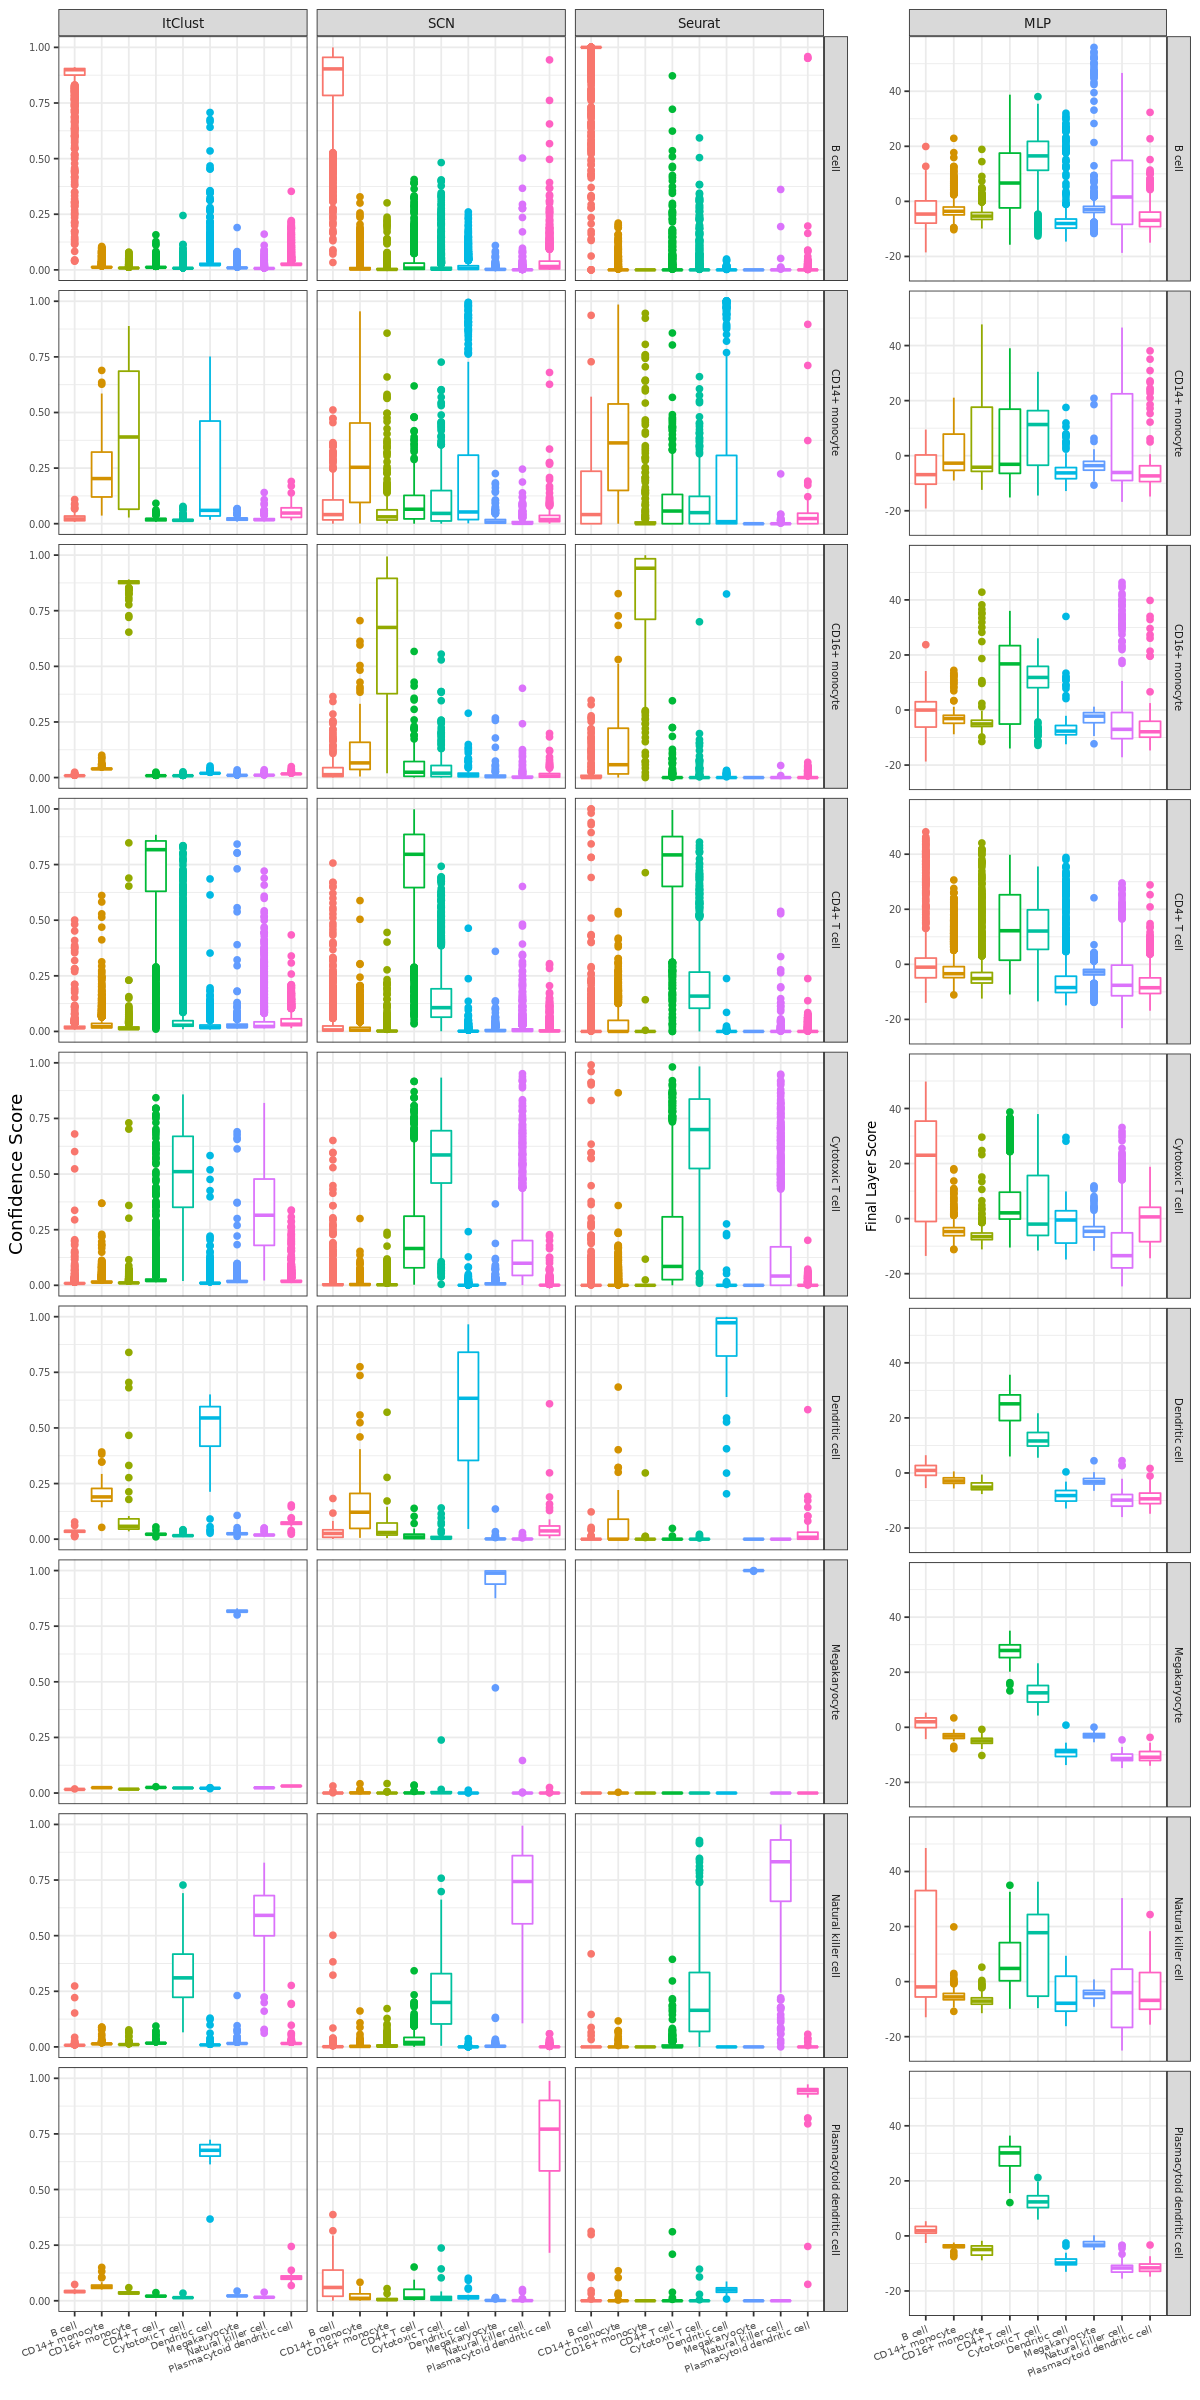

In [96]:
s3<- ggpubr::ggarrange(x,plot_mlp, ncol=2, nrow=1, widths=c(3,1.2))
s3

In [97]:
output <- "../Results/" 
ggplot2::ggsave(paste0(output, "s3_confidencescores.png"), plot=s3, device = "png", dpi=350, width=178, height = 300,units = "mm",bg = "white")